In [1]:
import pandas as pd

# Reading dataset
df = pd.read_csv('/home/pedro/Desktop/leonardo_book/jplus.csv')
df = df[df['spCl'].notna()] # Removing line with missing targets

df = df[df['spCl']!= 'QSO'] 


print(df.iloc[:4,12:])

    J0660   J0861        g-r       r-i       i-z       c_r    spCl
0  16.629  16.341   0.687937  0.304804  0.175068  0.942812    STAR
1  19.999  19.291  77.997734  0.868481  0.294882  1.158911  GALAXY
2  19.358  18.754   2.889879  0.947548  0.464302  0.905916  GALAXY
3  17.237  17.039   0.639683  0.316179  0.135836  0.938290    STAR


In [2]:
# Vector exampledf = df[df['spCl'].notna()] # Removing line with missing targets
print(df.iloc[[3],11:])

    J0515   J0660   J0861       g-r       r-i       i-z      c_r  spCl
3  18.046  17.237  17.039  0.639683  0.316179  0.135836  0.93829  STAR


In [3]:
# Separating features and targets
y = df[['spCl']]
x = df.iloc[:,2:-1]

In [4]:
# Number of objects
print('Galaxies: %d' % (df['spCl']=='GALAXY').sum())
print('Star: %d' % (df['spCl']=='STAR').sum())

Galaxies: 127714
Star: 45442


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data distribution for r (rSDSS) photometric band
bins = 'auto'
log = False
normed = False
alpha = 0.6

d=df['rSDSS']
plt.figure(figsize =(7,4))
bins=np.histogram(np.hstack((df['rSDSS'][df['spCl'] == 'QSO'],df['rSDSS'][df['spCl'] =='STAR'],df['rSDSS'][df['spCl'] =='GALAXY'])), bins=300)[1] #get the bin edges
plt.hist(df['rSDSS'][df['spCl'] == 'GALAXY'], bins=bins, log=log, label='Galaxies', alpha=alpha, color='red', edgecolor = 'black')
plt.hist(df['rSDSS'][df['spCl'] == 'STAR'], bins=bins, log=log, label='Stars', alpha=alpha, color='blue', edgecolor = 'black')
plt.xlabel('r')
plt.ylabel('Frequency')
plt.xlim(13,24)
plt.legend(loc='upper left')
plt.show()

<Figure size 700x400 with 1 Axes>

In [6]:
# Mapping string to real values
df['spCl'] = df['spCl'].map({'GALAXY': 1, 'STAR': 0})

In [7]:
# Separating the data into test and training parts
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, stratify=y, test_size=0.2, random_state=5)

In [8]:
# Data standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    "max_depth": [4, 5, 6],
    "max_features": ["auto", "sqrt"],
    "n_estimators": [20, 50, 100]}

# Classifier
clf = RandomForestClassifier()
# Grid search for best parameters
clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
clf.fit(x_train, y_train)

print(clf.best_params_)

/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConvers

/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/pedro/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConvers

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [10]:
# Predicting values for test data
y_pred = clf.predict(x_test)

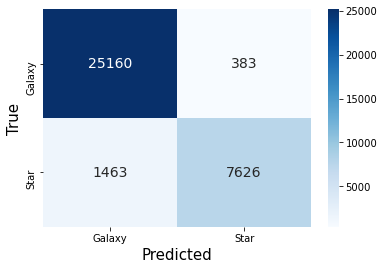

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 14}, fmt='d',cmap="Blues", ax = ax)
ax.xaxis.set_ticklabels(['Galaxy', 'Star'], fontsize = 10); 
ax.yaxis.set_ticklabels(['Galaxy', 'Star'], fontsize = 10);
ax.set_xlabel('Predicted', fontsize = 15);
ax.set_ylabel('True', fontsize = 15); 
plt.show()

In [12]:
from sklearn.metrics import accuracy_score

# Performance calculation 
accuracy  = accuracy_score(y_test,y_pred)
print('Accuracy %s' % np.around(accuracy, decimals = 2))

Accuracy 0.95
